# Вариационное исчисление

In [2]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import math

In [87]:
from importlib import reload 

import var_calc_func
reload(var_calc_func)

from var_calc_func import optimal_func

## Задача 1

$$ \int_0^2 y^2 + y^{'^{2}} \text dt$$

$$ y(0) = 0 $$

$$ y(2) = 1 $$

$ y{'} $ на каждом шаге считается как $ \frac{\Delta y}{\Delta t} = \frac{  y(t) - y(t-1) }{\Delta t}$

Аналитическое решение для $ y $  выглядит так:

$$ y(t) =  \frac{\exp(t)-\exp(-t)}{\exp(2) - \exp(-2)} $$

In [37]:
def f_analytical(t):
    return (np.exp(t) - np.exp(-t)) / (np.exp(2) - np.exp(-2))

In [38]:
num_of_fractions = 51
t = np.linspace(0, 2, num_of_fractions)
dt = t[1] - t[0]

In [39]:
def f(y):
    return np.sum(y[1:] ** 2 + ((y[1:] - y[:-1]) / dt) ** 2)

In [58]:
bounds = np.full((num_of_fractions, 2), (None, None))
# bound = [(None, None) for i in range(num_of_fractions)] # альтернативный способ задания границ
bounds[0] = (0, 0)
bounds[-1] = (1, 1)

In [59]:
y_0 = np.full(num_of_fractions, 0)
# y_0 = [0.5 for i in range(num_of_fractions)]

In [60]:
res = minimize(f, y_0, method='l-bfgs-b', bounds=bounds)

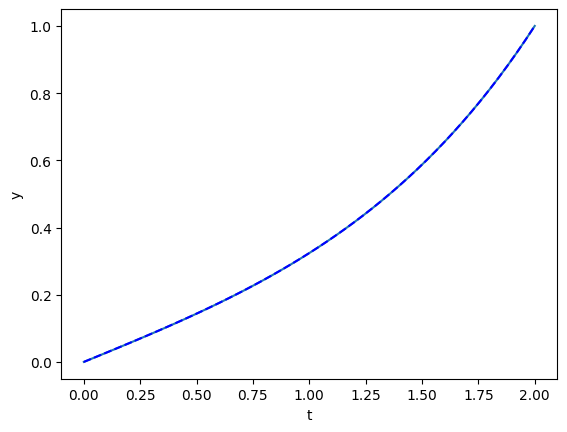

In [61]:
plt.plot(t, res.x, t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

## 2ой способ

In [89]:
def f(y, t, dt):
    return np.sum(y[1:] ** 2 + ((y[1:] - y[:-1]) / dt) ** 2)

In [90]:
t, y = optimal_func(0, 2, 0, 1, f)

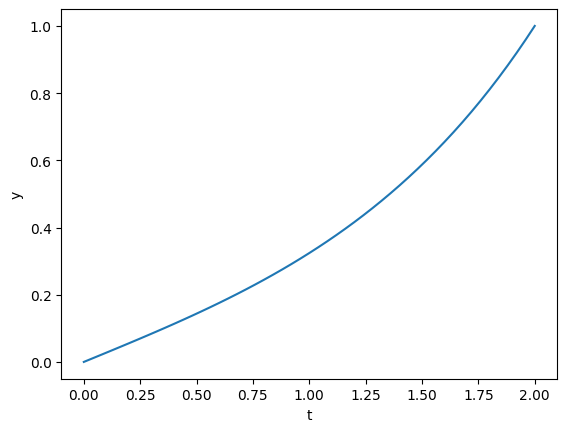

In [91]:
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

## Задача 2

$$ \int_0^2 ty' + y'^2 dt $$

$$ y(0) = 1 $$

$$y(2) = 0 $$

Аналитическое решение для $ y $  выглядит так:

$$ y(t) = -\frac{t^2}{4} + 1 $$

In [65]:
def f_analytical(t):
    return -(t ** 2) / 4 + 1

In [66]:
num_of_fractions = 51
t = np.linspace(0, 2, num_of_fractions)
dt = t[1] - t[0]

In [67]:
def f(y):
    return np.sum(t[1:] * ((y[1:] - y[:-1]) / dt) + ((y[1:] - y[:-1]) / dt) ** 2)

In [83]:
bounds = np.full((num_of_fractions, 2), (None, None))
bounds[0] = (1, 1)
bounds[-1] = (0, 0)

In [84]:
y_0 = np.full(num_of_fractions, 0.5)

In [85]:
res = minimize(f, y_0, method='l-bfgs-b', bounds=bounds)

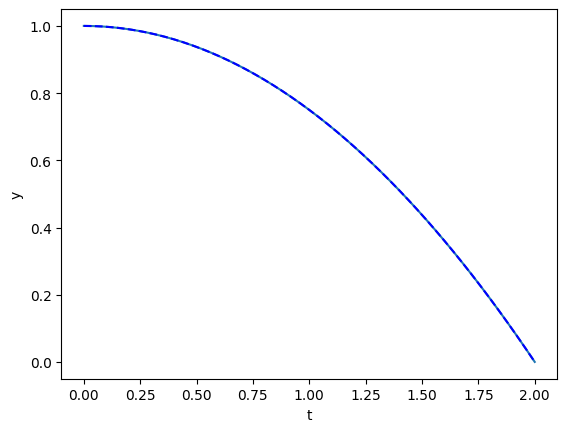

In [86]:
plt.plot(t, res.x, t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

## Задача 3

$$ \int_0^1 y \cdot y^{'^2} \text dt $$

$$ y(0) = 1 $$ 

$$y(1) = 4 $$ 

Аналитическое решение: $$ y = (7 \cdot t + 1) ^ {2/3} $$

In [92]:
def f_analytical(t):
    return (7 * t + 1) ** (2/3)

In [93]:
def f(y, t, dt):
    return np.sum(y[1:] * ((y[1:] - y[:-1]) / dt) ** 2)

In [94]:
t, y = optimal_func(0, 1, 1, 4, f)

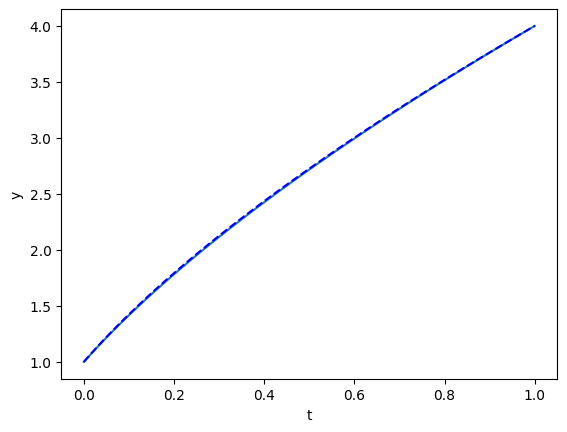

In [95]:
plt.plot(t, y, t, f_analytical(t), '--b')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

## Задача 4

$$ \int_0^1 y + y^{''^2} \text dt$$

$$ y(0) = 1 $$ 

$$ y(1) = 4 $$

In [96]:
def f(y, t, dt):
    dy = (y[1:] - y[:-1]) / dt
    dy2 = (dy[1:] - dy[:-1]) / dt
    return np.sum(y[2:] + dy2 ** 2)

In [97]:
t, y = optimal_func(0, 1, 1, 4, f)

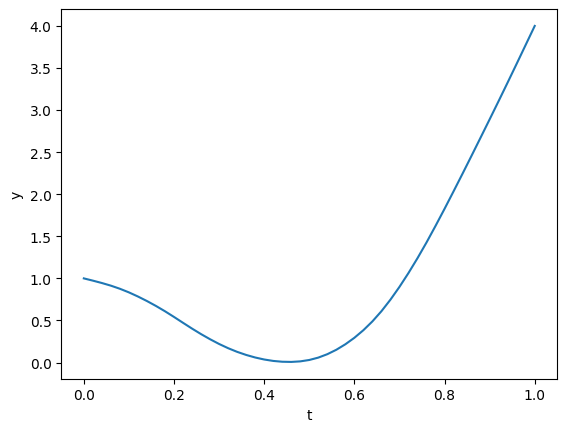

In [98]:
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()